In [1]:
#!pip install soundfile    ->  웹 url 음악로드 하고 저장  
#!pip install librosa    ->  음악과 오디오를 처리하는 python 분석모듈 
#!pip install --upgrade paramiko   -> 추가 패키지 업데이트  

 ### API 샘플 코드를 실행해 보자.   

In [2]:
#exam01) API 샘플 코드 실행 
import librosa
filename = librosa.example('nutcracker')  # 샘플 데이터  
#librosa.load(path, *, sr=22050, mono=True, offset=0.0, duration=None, dtype=<class 'numpy.float32'>, res_type='soxr_hq')
y, sr = librosa.load(filename , duration = 20 )   

In [3]:
#음성확인 
import IPython.display  #  주피터 노트북 라이브러리  
IPython.display.Audio(data=y,  rate=sr)

In [4]:
# 로드된 데이터를 확인 하자.  
print(y)  #실제 음성  데이터  
print(sr) # 표본 샘플    = HZ 단위  
print("전체 오디오 샘플 수  : " ,  len(y))
print("duration  :", len(y)/sr) 

[ 2.2716868e-06  5.3327185e-06 -7.2473276e-06 ...  7.9551987e-02
  7.2584212e-02  6.9123760e-02]
22050
전체 오디오 샘플 수  :  441000
duration  : 20.0


In [5]:
# 소리파일의 템포를 비트로 감지 해보자. -> 소리 리듬정보를 리턴  

#beats per minute  -> BPM   : 1분간의 박수를 나타내는 값  , 곡의 템포를 나타내는 숫자로 리턴   
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

#추출된 비트 프레임을 시간(초)로 변환  ->  음악 분석 작업 
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
print(beat_times)

Estimated tempo: 112.35 beats per minute
[ 1.18421769  1.71827664  2.32199546  2.87927438  3.45977324  4.01705215
  4.59755102  5.13160998  5.7353288   6.29260771  6.84988662  7.40716553
  7.9876644   8.54494331  9.12544218  9.63628118 10.21678005 10.72761905
 11.28489796 11.79573696 12.32979592 12.86385488 13.42113379 13.95519274
 14.4892517  15.02331066 15.55736961 16.09142857 16.62548753 17.15954649]


Text(0.5, 1.0, 'nutcracker')

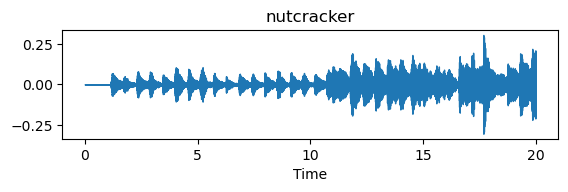

In [6]:
#exam02) API 샘플 코드 실행  / 시각화 -> 오디오 신호의 진폭을 시간별로 확인 해보자. 
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(3, 1, 1)
librosa.display.waveshow(y, sr=sr)  # 웨이브폼을 그래프로 표시하겠다.  -> 오디오 신호진폭 확인 
plt.title('nutcracker')

In [7]:
#exam03) API 샘플 코드 실행  하모니를 살펴 보자 . HPSS(Harmonics/percussives Sound Separation )
#음원중에 조파음/타악기 음  -> 시간방향으로  또는 주파수 방향으로 매끄럽운 소리를 제외한 양자화 작업

y_harmonic, y_percussive = librosa.effects.hpss(y) # 양자화 분리 작업  -> 음성인식

print (y_harmonic.shape)
print(y_harmonic)  # 오디오 신호의 하모니 값
print(y_percussive)

(441000,)
[ 9.6558688e-07  1.9192105e-06 -2.4968738e-06 ...  5.8013145e-02
  5.1643666e-02  4.2329021e-02]
[ 1.3061010e-06  3.4135082e-06 -4.7504541e-06 ...  2.1538837e-02
  2.0940546e-02  2.6794737e-02]


In [8]:
#exam04) 위 분리된 데이터를 각각 실행해서 들어 보자. 

# 멜로디 부분 확인 
IPython.display.Audio(data=y_harmonic,  rate=sr)

# 타악기 음 확인  -> 비트 추출  -> 리듬 분석  
IPython.display.Audio(data=y_percussive,  rate=sr)

Text(0.5, 1.0, 'harmonic+percussive')

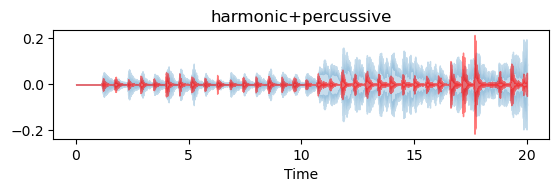

In [9]:
#exam04) 위 분리된 데이터를 시각화 해보자 
plt.figure()
plt.subplot(3, 1, 1)
librosa.display.waveshow(y_harmonic, sr=sr , alpha =  0.25)  # 웨이브폼을 그래프로 표시하겠다.  -> 오디오 신호진폭 확인 
librosa.display.waveshow(y_percussive, sr=sr ,alpha= 0.5, color='r' )  # 웨이브폼을 그래프로 표시하겠다.  -> 오디오 신호진폭 확인 
plt.title('harmonic+percussive') 

In [10]:
#exam05)  test.wav 파일을 읽어서 new_file.flac로 저장해보자. 
import soundfile as sf  # read(), write()
audiodata ,samplerate   = sf. read('img/test.wav')
sf.write('img/new_file.flac', audiodata ,samplerate)
sf.write('img/new_file02.flac', audiodata ,samplerate)
sf.write('img/new_file02.wav', audiodata ,samplerate)
IPython.display.Audio(data=audiodata,  rate=samplerate)

In [11]:
#exam06)  위에서 저장된 2개의 파일을 Audio로  바로 호출해서 확인해보자.  
IPython.display.Audio('img/new_file.flac')
IPython.display.Audio('img/new_file02.wav')

#exam07)사람의 음성을 확인 해보자
IPython.display.Audio("http://www.nch.com.au/acm/8k16bitpcm.wav")

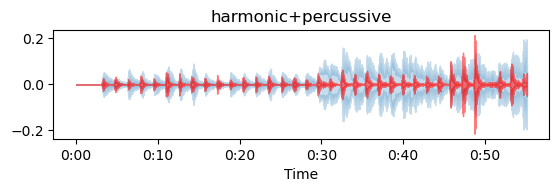

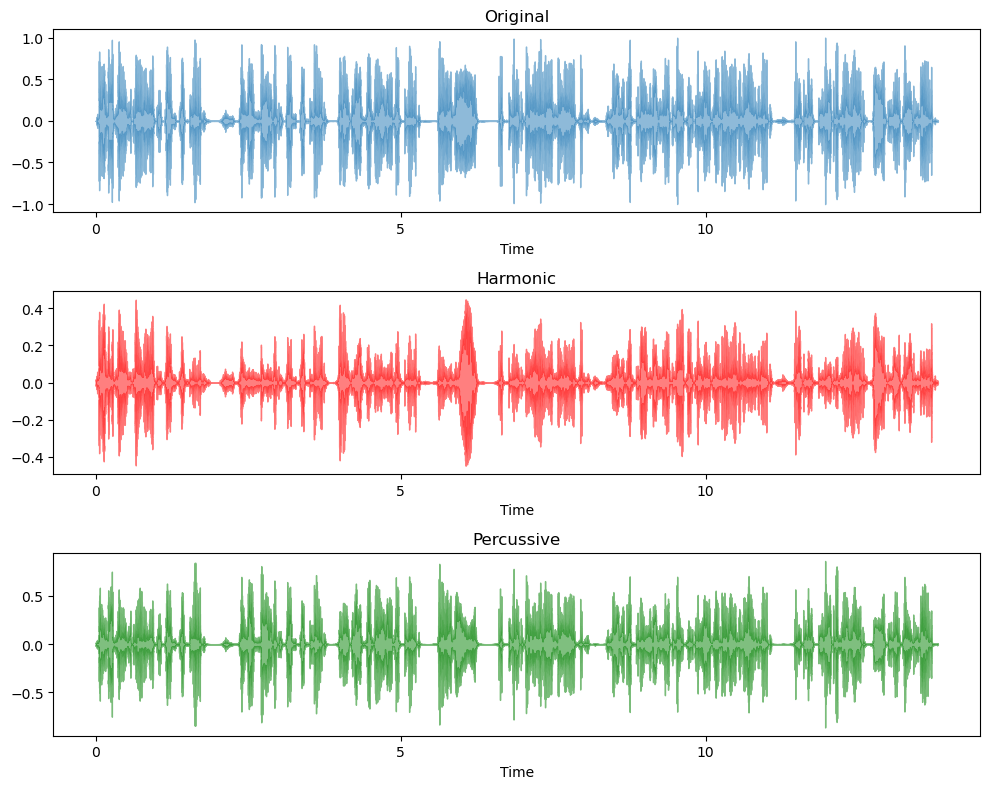

In [12]:
#exam08)
# http://www.nch.com.au/acm/8k16bitpcm.wav 파일을  new_file.flac 로 저장해서 들어 보자.  
import requests   #파이선 http 라이브러리  

###########1. 웹 다운로드  
url = 'http://www.nch.com.au/acm/8k16bitpcm.wav'
r = requests.get(url)

with open('img/my_test.wav', 'wb') as f:
    f.write(r.content)
    
    
##########2. 파일 로드 후 다른이름으로 저장  
audiodata, samplerate = sf.read('img/my_test.wav')
sf.write('img/new_file.flac', audiodata, samplerate)


########3. 'harmonic+percussive'로 시각화 해보자.  
y, sr = librosa.load('img/new_file.flac', sr=None)  

harmonic, percussive = librosa.effects.hpss(y)

plt.figure()
plt.subplot(3, 1, 1)
librosa.display.waveshow(y_harmonic, sr=sr , alpha =  0.25)  # 웨이브폼을 그래프로 표시하겠다.  -> 오디오 신호진폭 확인 
librosa.display.waveshow(y_percussive, sr=sr ,alpha= 0.5, color='r' )  # 웨이브폼을 그래프로 표시하겠다.  -> 오디오 신호진폭 확인 
plt.title('harmonic+percussive') 

###### 4. 각 내용을 waveshow하고 png로 저장하고 싶다. 

plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
librosa.display.waveshow(y, sr=sr, alpha=0.5)
plt.title('Original')

plt.subplot(3, 1, 2)
librosa.display.waveshow(harmonic, sr=sr, alpha=0.5, color='r')
plt.title('Harmonic')

plt.subplot(3, 1, 3)
librosa.display.waveshow(percussive, sr=sr, alpha=0.5, color='g')
plt.title('Percussive')

plt.tight_layout()
plt_path = 'img/hrmonic_percussive.png'
plt.savefig(plt_path)

In [ ]:
#exam09) 스펙트럼 확인 해보자.  
#https://librosa.org/doc/latest/generated/librosa.display.specshow.html#librosa.display.specshow
#librosa.stft(y)  -> 로드 된 데이터를 스펙트럼 알고리즘을 적용 

# 선형 주파수 스케일 + 로그 주파수 스케일로 시각화  = 음향 특성 분석  

import matplotlib.pyplot as plt
import numpy as np

y, sr = librosa.load(librosa.ex('choice'), duration=15)  # 15동안 로드  

fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)

#  단시간 푸리에 변환 -> 절대값 변환  ->  DB(데시벨) 단위로 변환  -> 스케일링중 참조값은 최대값으로 하겠다
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max) 


# D값을 선형 주파수로 서브플랏으로 표시하겠다. 

img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                               sr=sr, ax=ax[0])
ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()

hop_length = 1024   #푸리에 연산시  오프 길이를 재지정  
D = librosa.amplitude_to_db(np.abs(librosa.stft(y, hop_length=hop_length)),
                            ref=np.max)

#로그 주파수 스케일로 확인하겠다. 
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length,
                         x_axis='time', ax=ax[1])
ax[1].set(title='Log-frequency power spectrogram')
ax[1].label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [ ]:
# #exam10) 노이즈 제거 후 확인 해보자. 
y, sr = librosa.load(librosa.ex('nutcracker'), duration=15)

D = librosa.stft(y) # 로드된 데이터를 스펙트럼 알고리즘 적용
#print(" 스펙트롬 데이터 확인 :", D)

# np.abs(D) > 0.01 조건에 만족하면 D, 그렇지 않으면  0  
D=np.where(np.abs(D) > 0.01, D, 0) # 임계값을 지정해서 잡음을 제거한다.

#print(" 잡음 제거 후  ", D)

In [ ]:
y_filtered = librosa.istft(D)  #역 푸리에 변환 
IPython.display.Audio(data=y_filtered,  rate=sr)

In [ ]:
# 하모니 분류 후 시각화 확인  
harmonic, percussive = librosa.effects.hpss(y_filtered) #잡음 후  
#y, sr 
h, p = librosa.effects.hpss(y)  # 잡음 전 

plt.figure()
plt.subplot(3, 1, 1)
librosa.display.waveshow(h, sr=sr , alpha =  0.25)  # 웨이브폼을 그래프로 표시하겠다.  -> 오디오 신호진폭 확인 
librosa.display.waveshow(p, sr=sr ,alpha= 0.5, color='r' )  # 웨이브폼을 그래프로 표시하겠다.  -> 오디오 신호진폭 확인 
plt.title('harmonic+percussive b')

plt.subplot(3, 1, 2)
librosa.display.waveshow(y_harmonic, sr=sr , alpha =  0.25)  # 웨이브폼을 그래프로 표시하겠다.  -> 오디오 신호진폭 확인 
librosa.display.waveshow(y_percussive, sr=sr ,alpha= 0.5, color='r' )  # 웨이브폼을 그래프로 표시하겠다.  -> 오디오 신호진폭 확인 
plt.title('harmonic+percussive a') 

In [ ]:
#exam11) 작은별에 배경음악에 사람음성을 결합한 다음 오디오로 들어보자.  'img/my_test.wav'
from IPython.display import display, Audio 

voice_filename = 'img/my_test.wav'
music_filename = 'img/작은별.mp3'

#1. 작은별 hpss 으로 분류 
music_data, sr_music = librosa.load(music_filename, sr=None)
harmonic_music, _ = librosa.effects.hpss(music_data)

#2. 사람음성  hpss 으로 분류 
voice_data, sr_voice = librosa.load(voice_filename, sr=None)
harmonic_voice, _ = librosa.effects.hpss(voice_data)

#3. 결합 
#3-1 길이 마추기
if sr_voice != sr_music:
    harmonic_music = librosa.resample(harmonic_music, orig_sr=sr_music, target_sr=sr_voice)

# 길이 조정
min_len = min(len(harmonic_voice), len(harmonic_music))
harmonic_voice = harmonic_voice[:min_len]
harmonic_music = harmonic_music[:min_len]
    
#3-2 결합
combined_audio = harmonic_voice + harmonic_music

#4. 오디오 확인 
display(Audio(data=combined_audio, rate=sr_voice))

In [ ]:
#exam11) 작은별에 배경음악에 사람음성을 결합한 다음 오디오로 들어보자.  'img/my_test.wav'
from IPython.display import display, Audio 

voice_filename = 'img/my_test.wav'
music_filename = 'img/작은별.mp3'

#1. 작은별 hpss 으로 분류 
music_data, sr_music = librosa.load(music_filename, sr=None)
#소리를 줄여보자. 
music_data =   0.1* music_data 
harmonic_music, percussive_music = librosa.effects.hpss(music_data)

#2. 사람음성  hpss 으로 분류  
voice_data, sr_voice = librosa.load(voice_filename, sr=None)
#음성을 강하게  
harmonic_voice, _ = librosa.effects.hpss(voice_data)
harmonic_voice = 2 * harmonic_voice

#3. 결합 
#3-1 길이 마추기
if sr_voice != sr_music:
    percussive_music = librosa.resample(percussive_music, orig_sr=sr_music, target_sr=sr_voice)

# 길이 조정
min_len = min(len(harmonic_voice), len(percussive_music))
harmonic_voice = harmonic_voice[:min_len]
percussive_music = percussive_music[:min_len]
    
#3-2 결합
combined_audio = harmonic_voice + percussive_music

#4. 오디오 확인 
display(Audio(data=combined_audio, rate=sr_voice))

In [ ]:
#exam12) 작은별에 배경음악에 사람음성을 결합한 다음 오디오로 들어보자.  'img/my_test.wav'
# 음성의 노이즈를 제거 후 결합해 보자.  
from IPython.display import display, Audio 

voice_filename = 'img/my_test.wav'
music_filename = 'img/작은별.mp3'

#1. 작은별 hpss 으로 분류 
music_data, sr_music = librosa.load(music_filename, sr=None)
#소리를 줄여보자. 
music_data =   0.1* music_data 
harmonic_music, percussive_music = librosa.effects.hpss(music_data)

#2. 사람음성  hpss 으로 분류  
voice_data, sr_voice = librosa.load(voice_filename, sr=None)
#음성을 강하게  
harmonic_voice, _ = librosa.effects.hpss(voice_data)
#harmonic_voice = 2 * harmonic_voice

harmonic_voice_processed = np.where(np.abs(harmonic_voice) > 0.03, harmonic_voice, 0)

#3. 결합 
#3-1 길이 마추기
if sr_voice != sr_music:
    percussive_music = librosa.resample(percussive_music, orig_sr=sr_music, target_sr=sr_voice)

# 길이 조정
min_len = min(len(harmonic_voice_processed), len(percussive_music))
harmonic_voice = harmonic_voice_processed[:min_len]
percussive_music = percussive_music[:min_len]
    
#3-2 결합
combined_audio = harmonic_voice + percussive_music

#4. 오디오 확인 
display(Audio(data=combined_audio, rate=sr_voice))